# FALL 2020 -> CSE 6363 -> Machine Learning
## Assignment 3
### Problem 2
### Name:  Tirumala Manukonda (UTA ID# 1001662386)

#### Implementation of PCA -(Dimension Reduction)
__Summary__:
- Read in Train and Test data set MNIST dataset
- Implement the  PC =myPCA(X, k),MyPCA class that does dimension reduction to k dimenssions from the X data
- Apply PCA on MNIST dataset,and observe the data
- Visualize the data using the first 2 PC, 
- Visualize 10 PC as images
- Apply 30 PC on the given data and do the classification using softmax logistic regression for 10 epochs
- Apply softmax logistic regression for 10 epochs on raw data and compare both the results


In [218]:
#Required libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [219]:
#Reading the csv file from the local folder

Train_df = pd.read_csv("C:/Users/Dell/OneDrive/Documents/mnist_train.csv",sep=',',header=None) 
print(Train_df)
print(Train_df.shape)

Test_df = pd.read_csv("C:/Users/Dell/OneDrive/Documents/mnist_test.csv",sep=',',header=None) 
print(Test_df)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

In [220]:
#assiging the class labels to y train and test data

X_train = Train_df.iloc[:,1:]
y_train =  Train_df[0]
labels = y_train

X_test = Test_df.iloc[:,1:]
y_test =  Test_df[0]

In [295]:
#implementation of PCA 

class myPCA:

    def __init__(self, k=None):
        self.k = k
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean 
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first k eigenvectors
        self.components = eigenvectors[0:self.k]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

- Find the mean and do standard scaling of all  the data, find Covariance 
- Calculateeigen values and eigen vectors of the covariance matrix, i.e eigen decomposition. 
  The eigen values tell us the variance in the data set and eigen vectors tell us the corresponding direction of the variance.
- Select top k eigen values and corresponding eigen vectors
- new data set = dot product([old data set],[eigen vector] 

In [296]:
#Training data using the PCA
PC = myPCA()
PC.fit(X_train)
XPC_train = PC.transform(X_train)

In [297]:
#Dimension Reductionality to 2 components

PC = myPCA(2)
PC.fit(X_train)
X_pc2= PC.transform(X_train)
X_pc2

array([[ -123.93258866,  -312.67426202],
       [-1011.71837587,  -294.85703827],
       [   51.84960805,   392.17315286],
       ...,
       [  178.0534496 ,   160.07821109],
       [ -130.60607208,    -5.59193642],
       [  173.43595244,   -24.71880226]])

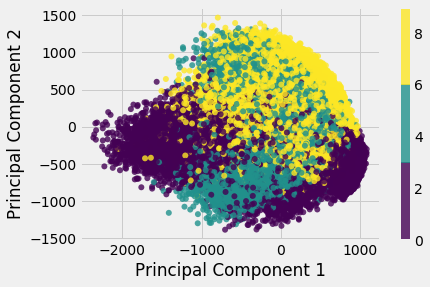

In [281]:
#2d scatter plot for the 2 Dimessions or 2 components from PC2
x1 = X_pc2[:, 0]
x2 = X_pc2[:, 1]

plt.scatter(x1, x2,
        c=y_train, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

#### _Analysis_ :-  The data looks good with labels still classified between 0,9 

In [298]:
#Dimension Reductionality to 10 components

PC = myPCA(10)
PC.fit(X_train)
X_pc10= PC.transform(X_train)
X_pc10

array([[ -123.93258866,  -312.67426202,   -24.51405176, ...,
         -159.79949383,  -363.51502076,  -198.42807734],
       [-1011.71837587,  -294.85703827,   596.33956104, ...,
          104.96959154,    40.45911807,  -150.9688987 ],
       [   51.84960805,   392.17315286,  -188.50974943, ...,
         -368.59187537,  -114.54607366,   178.50814363],
       ...,
       [  178.0534496 ,   160.07821109,  -257.61308227, ...,
          184.82252967,   -87.52434607,  -268.11498751],
       [ -130.60607208,    -5.59193642,   513.85867395, ...,
         -140.72877355,   -16.49578544,    93.84165761],
       [  173.43595244,   -24.71880226,   556.01889393, ...,
          154.45540238,    87.30363975,   120.77977976]])

Text(0.5, 0.98, '10-Component PCA')

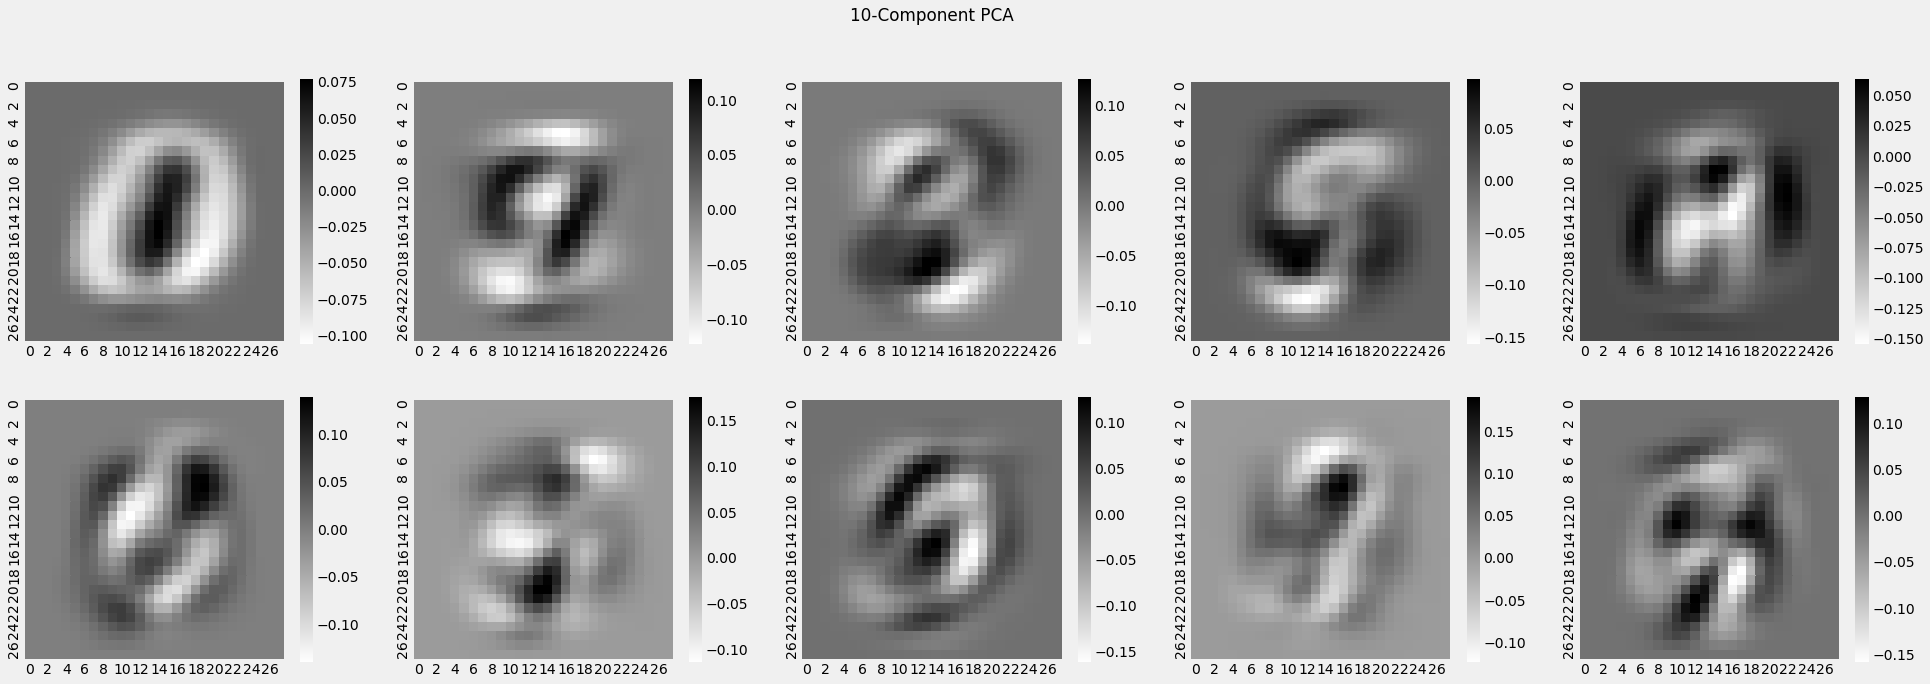

In [275]:
#visualize the 10PC images each as 28x28 image

plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 5, figsize=(30, 10))
sns.heatmap(PC.components[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(PC.components[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(PC.components[2, :].reshape(28, 28), ax=axarr[0][2], cmap='gray_r')
sns.heatmap(PC.components[3, :].reshape(28, 28), ax=axarr[0][3], cmap='gray_r')
sns.heatmap(PC.components[4, :].reshape(28, 28), ax=axarr[0][4], cmap='gray_r')
sns.heatmap(PC.components[5, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(PC.components[6, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')
sns.heatmap(PC.components[7, :].reshape(28, 28), ax=axarr[1][2], cmap='gray_r')
sns.heatmap(PC.components[8, :].reshape(28, 28), ax=axarr[1][3], cmap='gray_r')
sns.heatmap(PC.components[9, :].reshape(28, 28), ax=axarr[1][4], cmap='gray_r')
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[0][2].set_aspect('equal')
axarr[0][3].set_aspect('equal')
axarr[0][4].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')
axarr[1][2].set_aspect('equal')
axarr[1][3].set_aspect('equal')
axarr[1][4].set_aspect('equal')
plt.suptitle('10-Component PCA')


#### _Analysis_ :- Visualize the 10 PC images as 28X28 shows that these images are labels of numneric digits and numberrs like are 0,3,5,6,8,9 are clearly visible and other labels are little unclear.

In [299]:
# 30 dimenssional data of the training data after PCA Dimession Reduction
PC = myPCA(30)
PC.fit(X_train)
X_projected = PC.transform(X_train)
new_coordinates = np.vstack((X_projected.T, labels)).T
X30_train = pd.DataFrame(data=X_projected)


In [302]:
# 30 dimenssional data of the testing data after PCA Dimession Reduction
PC = myPCA(30)
PC.fit(X_test)
Xtest_projected = PC.transform(X_test)
X30_test = pd.DataFrame(data=Xtest_projected)
X30_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-411.260996,-686.561610,-51.112946,-242.568734,-483.543679,-380.059221,425.770040,-585.967035,-220.254067,273.410837,...,-39.007708,228.643698,213.222735,-140.927080,-28.002819,35.381769,82.135805,-100.273346,-77.272515,-198.625958
1,58.065935,983.170260,8.884690,397.280327,-171.260714,447.786923,127.735387,-198.269662,210.898134,142.081597,...,-467.348100,57.571200,82.894294,77.923772,-238.056905,257.146601,-76.077863,42.793334,28.545741,-46.485320
2,-935.105339,459.074661,319.994509,262.530502,-469.901234,-126.970623,-32.415506,153.778807,84.450787,153.350992,...,-34.815648,77.489720,15.728144,58.289575,7.434891,38.243503,134.335254,-181.385335,-38.344790,-202.362424
3,1255.666506,-106.992541,121.966982,-246.649754,-318.413708,405.654517,627.208731,-128.324728,23.149987,114.455706,...,-122.568288,152.300829,8.394738,124.819820,-48.392648,-317.078594,-24.397987,153.875945,-140.360330,109.916929
4,132.887049,-744.541845,-61.201531,703.883285,-129.236086,-279.906649,-509.407659,-281.389673,-226.343878,-52.432306,...,-100.111975,21.279287,129.844863,239.735912,-447.085819,56.273227,-182.197056,-23.480196,40.545127,-186.049081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,327.695238,559.444228,102.775232,301.268244,980.661496,-782.018841,750.376869,-372.021540,-461.894919,-35.646486,...,21.166825,-28.532574,-392.711939,123.481923,144.636954,157.975758,-196.531861,-62.825067,-170.021742,248.162729
9996,531.398659,740.336631,-851.955795,126.627889,-26.970703,121.319737,638.016943,-780.243887,109.888158,41.067995,...,-465.357200,-200.950451,140.960218,129.741506,-166.980202,-290.543597,137.063510,72.152174,177.224294,47.718014
9997,-282.415573,-550.853516,197.570885,-549.198260,678.253380,-18.603937,-36.998255,283.324208,-134.910051,742.671280,...,308.030713,306.014546,138.842457,19.644762,106.763886,0.842313,84.397413,167.777408,73.641149,-123.298551
9998,-287.270866,155.851849,536.987521,-486.338178,-195.065531,270.803954,96.098415,-65.676405,332.038483,87.650914,...,-105.950121,117.784585,322.601893,252.804055,342.986322,-305.678020,177.015855,-99.599789,-240.990077,60.085204


In [303]:
#LogisticRegression using softmax for the 30D data

t0 = time.time()
softmax_reg = LogisticRegression( penalty='l1', solver='saga', tol=0.1)
softmax_reg.fit(X30_train, y_train)
score = softmax_reg.score(X30_test, y_test)
print("Test score with L1 penalty: %.4f" % score)
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Test score with L1 penalty: 0.0384
Example run in 0.803 s


In [306]:
#LogisticRegression using softmax for the 30D data using 10 epochs

import time

epochs = 10
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    softmax_reg = LogisticRegression( penalty='l1', solver='saga', tol=0.1)
    softmax_reg.fit(X30_train, y_train)
    score = softmax_reg.score(X30_test, y_test)
    print("Test score  %.4f" % score)
print("Time taken: %.2fs" % (time.time() - start_time))



Start of epoch 0
Test score  0.0401

Start of epoch 1
Test score  0.0380

Start of epoch 2
Test score  0.0389

Start of epoch 3
Test score  0.0382

Start of epoch 4
Test score  0.0393

Start of epoch 5
Test score  0.0393

Start of epoch 6
Test score  0.0392

Start of epoch 7
Test score  0.0373

Start of epoch 8
Test score  0.0396

Start of epoch 9
Test score  0.0389
Time taken: 0.92s


- Time taken for the 30D data is around 0.90 secs

In [307]:
#Raw data without dimenssion reduction
import time
epochs = 10
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    softmax_reg = LogisticRegression( penalty='l1', solver='saga', tol=0.1)
    softmax_reg.fit(X_train, y_train)
    score = softmax_reg.score(X_test, y_test)
    print("Test score with L1 penalty: %.4f" % score)
print("Time taken: %.2fs" % (time.time() - start_time))




Start of epoch 0
Test score with L1 penalty: 0.9229

Start of epoch 1
Test score with L1 penalty: 0.9239

Start of epoch 2
Test score with L1 penalty: 0.9255

Start of epoch 3
Test score with L1 penalty: 0.9248

Start of epoch 4
Test score with L1 penalty: 0.9250

Start of epoch 5
Test score with L1 penalty: 0.9239

Start of epoch 6
Test score with L1 penalty: 0.9245

Start of epoch 7
Test score with L1 penalty: 0.9243

Start of epoch 8
Test score with L1 penalty: 0.9247

Start of epoch 9
Test score with L1 penalty: 0.9236
Time taken: 37.26s


- Time taken for the raw data without dimenssion reduction is 37.26s

Text(0.5, 0.98, 'Output labels')

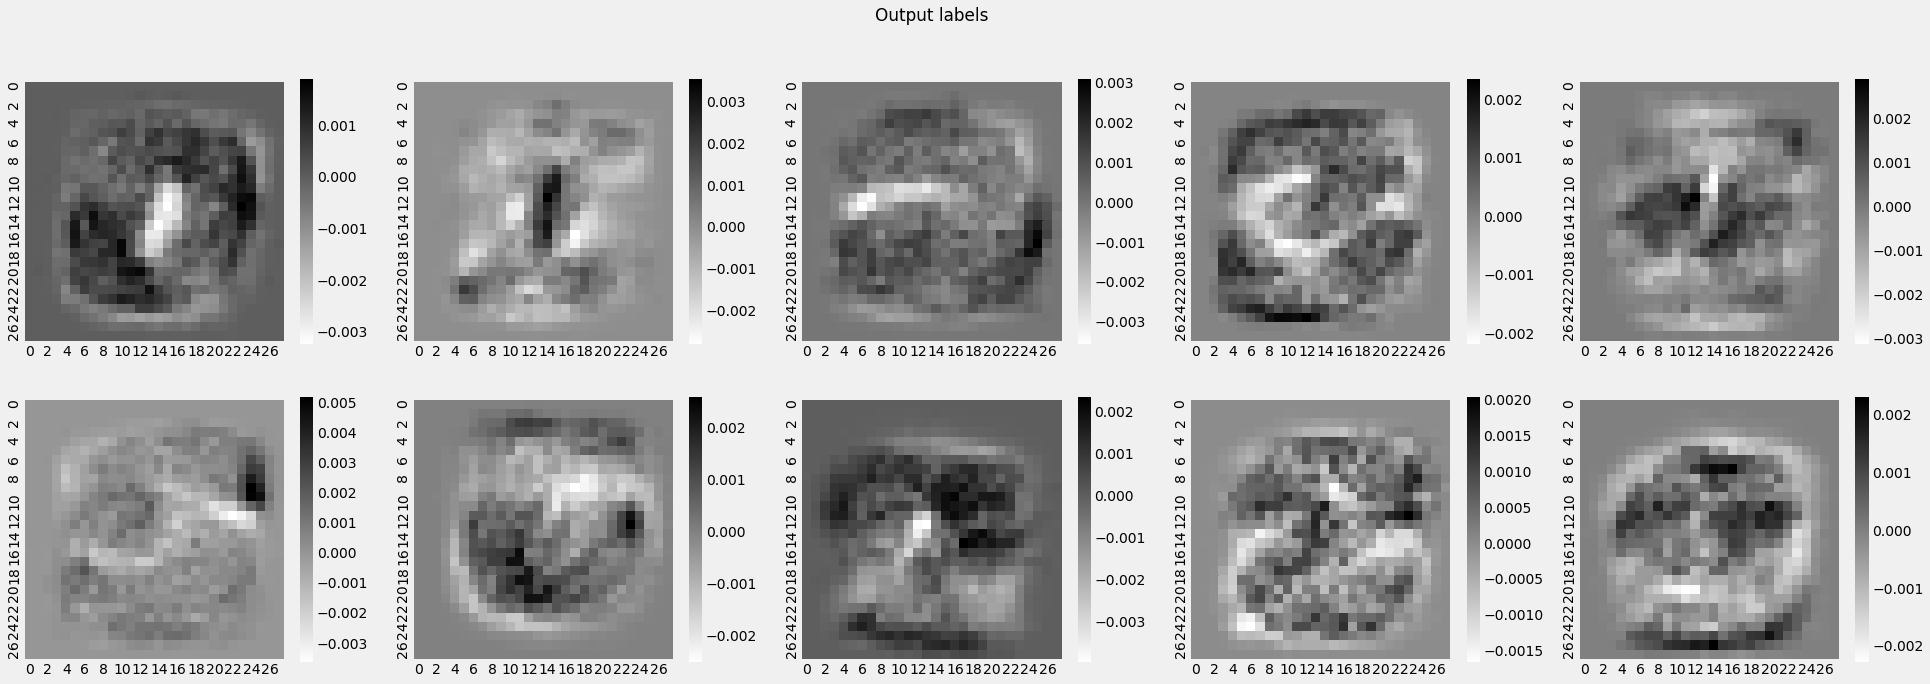

In [309]:
#Plot the output data label images as 28x28 image

softmax_reg = LogisticRegression(penalty='l1', solver='saga', tol=0.1)
softmax_reg.fit(X_train, y_train)
coef = softmax_reg.coef_.copy()

plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 5, figsize=(30, 10))

sns.heatmap(coef[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(coef[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(coef[2, :].reshape(28, 28), ax=axarr[0][2], cmap='gray_r')
sns.heatmap(coef[3, :].reshape(28, 28), ax=axarr[0][3], cmap='gray_r')
sns.heatmap(coef[4, :].reshape(28, 28), ax=axarr[0][4], cmap='gray_r')
sns.heatmap(coef[5, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(coef[6, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')
sns.heatmap(coef[7, :].reshape(28, 28), ax=axarr[1][2], cmap='gray_r')
sns.heatmap(coef[8, :].reshape(28, 28), ax=axarr[1][3], cmap='gray_r')
sns.heatmap(coef[9, :].reshape(28, 28), ax=axarr[1][4], cmap='gray_r')
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[0][2].set_aspect('equal')
axarr[0][3].set_aspect('equal')
axarr[0][4].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')
axarr[1][2].set_aspect('equal')
axarr[1][3].set_aspect('equal')
axarr[1][4].set_aspect('equal')
plt.suptitle('Output labels')


#### _Analysis_ :- The above plot shows the labels 28x28 image of the 10 output nodes, comparing the label images of PCA and these shows that PCA images are little more clearer than the raw data images, its more smoother label images for the PCA data than the raw data